In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

## Importing the required data

In [3]:
# importing all the data
campaign_data = pd.read_csv('campaign_data.csv')
coupon_item_mapping = pd.read_csv('coupon_item_mapping.csv')
customer_demographics = pd.read_csv('customer_demographics.csv')
customer_transaction_data = pd.read_csv('customer_transaction_data.csv')
item_data = pd.read_csv('item_data.csv')
train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('cupon_test.csv')

## Checking each data table

In [5]:
campaign_data.head(200)

,campaign_id,campaign_type,start_date,end_date
0,22,Y,04/12/13,11/01/14
1,23,N,14/10/13,20/10/13
2,20,N,16/02/13,21/02/13
3,27,Y,16/06/13,18/06/13
4,26,N,11/12/13,16/12/13
...,...,...,...,...
195,27,N,07/02/13,03/04/13
196,27,N,12/07/13,16/07/13
197,25,Y,31/08/13,23/09/13
198,20,N,28/04/13,06/05/13


In [6]:
coupon_item_mapping.head(200)


,coupon_id,item_id
0,917,68
1,808,70
2,880,76
3,743,35
4,705,77
...,...,...
195,532,63
196,388,29
197,343,29
198,894,59


In [7]:
customer_demographics.head(200)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,56+,Married,True,4,2.0,6
1,2,26-35,NaN,True,3,3.0,9
2,3,56+,Married,True,4,2.0,8
3,4,18-25,Married,True,4,1.0,7
4,5,36-45,Single,False,4,NaN,6
...,...,...,...,...,...,...,...
195,196,26-35,Single,False,3,NaN,8
196,197,18-25,NaN,False,6,5.0,5
197,198,46-55,NaN,True,3,4.0,9
198,199,56+,NaN,True,2,6.0,2


In [8]:
customer_transaction_data.head(200)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2023-04-03,114,24,8,717.98,5.72,44.98
1,2023-09-08,2590,33,2,659.86,73.51,5.15
2,2023-12-09,2612,11,9,275.37,26.20,16.03
3,2023-04-11,2649,82,4,899.30,31.23,30.95
4,2023-04-23,1719,45,5,943.36,10.29,19.05
...,...,...,...,...,...,...,...
195,2023-11-25,159,28,5,449.83,29.74,28.07
196,2023-05-23,838,74,1,866.20,58.57,4.30
197,2023-07-13,2149,97,2,67.38,32.54,6.40
198,2023-12-28,990,63,7,675.96,60.00,33.38


In [9]:
test_data.head()

,id,campaign_id,coupon_id,customer_id
0,1,29,963,1949
1,2,28,236,2159
2,3,29,342,1705
3,4,23,688,2855
4,5,27,689,2393


In [10]:
test_data.head()

,id,campaign_id,coupon_id,customer_id
0,1,29,963,1949
1,2,28,236,2159
2,3,29,342,1705
3,4,23,688,2855
4,5,27,689,2393


In [11]:
item_data.head()

,item_id,brand,brand_type,category
0,10,19,Local,Electronics
1,11,7,Local,Electronics
2,12,3,Established,Electronics
3,13,10,Local,Sports
4,14,7,Local,Clothing


## Preparing data for the model

In [13]:
data= train_data

In [14]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,24,647,2197,0
1,2,27,167,2254,0
2,3,20,212,2901,1
3,4,24,819,571,1
4,5,21,699,960,0


In [15]:
# definning a function to map all the table values into one table
def add_column(column_key,column_name,table_name):
    if table_name[column_key].duplicated().any():
    # Handle duplicates (e.g., drop duplicates or use a different mapping approach)
        print("Warning: Duplicate values found in column_key. Adjusting approach.")
    # Example: Drop duplicates
        table_name = table_name.drop_duplicates(subset=[column_key])

# Proceed with mapping
    #data[column_name] = data[column_key].map(table_name.set_index(column_key)[column_name])
    data[column_name]= data[column_key].map(table_name.set_index(column_key)[column_name])

# defining a function to map values explicitly from one table to other
def add_column_explicit(column_key,column_name,table_name):
    mapping = dict(table_name[[column_key, column_name]].values)
    data[column_name] = data[column_key].map(mapping)

In [16]:
add_column('campaign_id','campaign_type',campaign_data)
add_column('campaign_id','start_date',campaign_data)
add_column('campaign_id','end_date',campaign_data)
add_column('campaign_id','end_date',campaign_data)
add_column('customer_id','age_range',customer_demographics)
add_column('customer_id','marital_status',customer_demographics)
add_column('customer_id','rented',customer_demographics)
add_column('customer_id','family_size',customer_demographics)
add_column('customer_id','no_of_children',customer_demographics)
add_column('customer_id','income_bracket',customer_demographics)

In [17]:
add_column_explicit('customer_id','item_id',customer_transaction_data)
add_column_explicit('customer_id','date',customer_transaction_data)
add_column_explicit('customer_id','quantity',customer_transaction_data)
add_column_explicit('customer_id','selling_price',customer_transaction_data)
add_column_explicit('customer_id','other_discount',customer_transaction_data)
add_column_explicit('customer_id','coupon_discount',customer_transaction_data)
add_column_explicit('item_id','brand',item_data)
add_column_explicit('item_id','brand_type',item_data)
add_column_explicit('item_id','category',item_data)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78368 entries, 0 to 78367
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 78368 non-null  int64  
 1   campaign_id        78368 non-null  int64  
 2   coupon_id          78368 non-null  int64  
 3   customer_id        78368 non-null  int64  
 4   redemption_status  78368 non-null  int64  
 5   campaign_type      78368 non-null  object 
 6   start_date         78368 non-null  object 
 7   end_date           78368 non-null  object 
 8   age_range          78368 non-null  object 
 9   marital_status     52650 non-null  object 
 10  rented             78368 non-null  bool   
 11  family_size        78368 non-null  int64  
 12  no_of_children     67298 non-null  float64
 13  income_bracket     78368 non-null  int64  
 14  item_id            78368 non-null  int64  
 15  date               78368 non-null  object 
 16  quantity           783

In [19]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,24,647,2197,0,Y,08/07/13,29/08/13,26-35,Married,...,9,86,2023-04-30,5,565.71,1.57,1.28,15,Established,Electronics
1,2,27,167,2254,0,Y,16/06/13,18/06/13,46-55,Married,...,8,31,2023-12-24,1,763.67,56.07,13.74,20,Local,Electronics
2,3,20,212,2901,1,N,16/02/13,21/02/13,36-45,Married,...,1,14,2023-02-01,8,824.10,70.84,21.88,7,Local,Clothing
3,4,24,819,571,1,Y,08/07/13,29/08/13,26-35,Married,...,7,16,2023-02-08,5,894.23,84.74,1.62,17,Established,Clothing
4,5,21,699,960,0,Y,30/07/13,28/08/13,36-45,Single,...,4,35,2023-08-30,2,232.78,29.91,14.74,15,Established,Electronics


## Cleaning the data

In [21]:
data.age_range.mode()

0    56+
Name: age_range, dtype: object

In [22]:
data.age_range.fillna(data.age_range.mode() , inplace=True)

In [23]:
data.age_range.isnull().values.any()

False

In [24]:
data.marital_status.isnull().values.any()

True

In [25]:
data.groupby('marital_status').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,rented,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
marital_status,,,,,,,,,,,,,,,,,,,,,
Married,26522,26522,26522,26522,26522,26522,26522,26522,26522,26522,...,26522,26522,26522,26522,26522,26522,26522,26522,26522,26522
Single,26128,26128,26128,26128,26128,26128,26128,26128,26128,26128,...,26128,26128,26128,26128,26128,26128,26128,26128,26128,26128


In [26]:
data['marital_status'].fillna(pd.Series(np.random.choice(['Married', 'Single'], size=len(data))), inplace=True)

In [27]:
data.marital_status.isnull().values.any()

False

In [28]:
data.rented.isnull().values.any()

False

In [29]:
data.groupby('rented').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
rented,,,,,,,,,,,,,,,,,,,,,
False,38275,38275,38275,38275,38275,38275,38275,38275,38275,38275,...,38275,38275,38275,38275,38275,38275,38275,38275,38275,38275
True,40093,40093,40093,40093,40093,40093,40093,40093,40093,40093,...,40093,40093,40093,40093,40093,40093,40093,40093,40093,40093


In [30]:
data['rented'].fillna(pd.Series(np.random.choice([0.0, 1.0], size=len(data))), inplace=True)

In [31]:
data.groupby('family_size').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
family_size,,,,,,,,,,,,,,,,,,,,,
1,12492,12492,12492,12492,12492,12492,12492,12492,12492,12492,...,12492,12492,12492,12492,12492,12492,12492,12492,12492,12492
2,13043,13043,13043,13043,13043,13043,13043,13043,13043,13043,...,13043,13043,13043,13043,13043,13043,13043,13043,13043,13043
3,13465,13465,13465,13465,13465,13465,13465,13465,13465,13465,...,13465,13465,13465,13465,13465,13465,13465,13465,13465,13465
4,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551
5,12875,12875,12875,12875,12875,12875,12875,12875,12875,12875,...,12875,12875,12875,12875,12875,12875,12875,12875,12875,12875
6,12942,12942,12942,12942,12942,12942,12942,12942,12942,12942,...,12942,12942,12942,12942,12942,12942,12942,12942,12942,12942


In [32]:
data.family_size.isnull().values.any()

False

In [33]:
data.groupby('family_size').count()['id']/78368

family_size
1    0.159402
2    0.166433
3    0.171818
4    0.172915
5    0.164289
6    0.165144
Name: id, dtype: float64

In [34]:
data['family_size'] = data['family_size'].fillna(pd.Series(np.random.choice(['1','2','3','4','5+'], size=len(data))))

In [35]:
data.no_of_children.isnull().values.any()

True

In [36]:
data.groupby('no_of_children').count()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
no_of_children,,,,,,,,,,,,,,,,,,,,,
1.0,11310,11310,11310,11310,11310,11310,11310,11310,11310,11310,...,11310,11310,11310,11310,11310,11310,11310,11310,11310,11310
2.0,11523,11523,11523,11523,11523,11523,11523,11523,11523,11523,...,11523,11523,11523,11523,11523,11523,11523,11523,11523,11523
3.0,10574,10574,10574,10574,10574,10574,10574,10574,10574,10574,...,10574,10574,10574,10574,10574,10574,10574,10574,10574,10574
4.0,11429,11429,11429,11429,11429,11429,11429,11429,11429,11429,...,11429,11429,11429,11429,11429,11429,11429,11429,11429,11429
5.0,11477,11477,11477,11477,11477,11477,11477,11477,11477,11477,...,11477,11477,11477,11477,11477,11477,11477,11477,11477,11477
6.0,10985,10985,10985,10985,10985,10985,10985,10985,10985,10985,...,10985,10985,10985,10985,10985,10985,10985,10985,10985,10985


In [37]:
data['no_of_children'] = data['no_of_children'].fillna(pd.Series(np.random.choice(['1', '2', '3', '4', '5', '6'], size=len(data)))
)

In [38]:
ind = data.groupby('income_bracket').count().index

In [39]:
percents = data.groupby('income_bracket').count()['id']/78368

In [40]:
data['income_bracket'] = data['income_bracket'].fillna(pd.Series(np.random.choice(ind, 
                                                      p=percents, size=len(data))))

In [41]:
#checking the clean data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78368 entries, 0 to 78367
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 78368 non-null  int64  
 1   campaign_id        78368 non-null  int64  
 2   coupon_id          78368 non-null  int64  
 3   customer_id        78368 non-null  int64  
 4   redemption_status  78368 non-null  int64  
 5   campaign_type      78368 non-null  object 
 6   start_date         78368 non-null  object 
 7   end_date           78368 non-null  object 
 8   age_range          78368 non-null  object 
 9   marital_status     78368 non-null  object 
 10  rented             78368 non-null  bool   
 11  family_size        78368 non-null  int64  
 12  no_of_children     78368 non-null  object 
 13  income_bracket     78368 non-null  int64  
 14  item_id            78368 non-null  int64  
 15  date               78368 non-null  object 
 16  quantity           783

In [42]:
data['campaign_type'] = data['campaign_type'].replace({'Y': 1, 'N': 0})

## Checking up the correlation heatmap before feature engineering

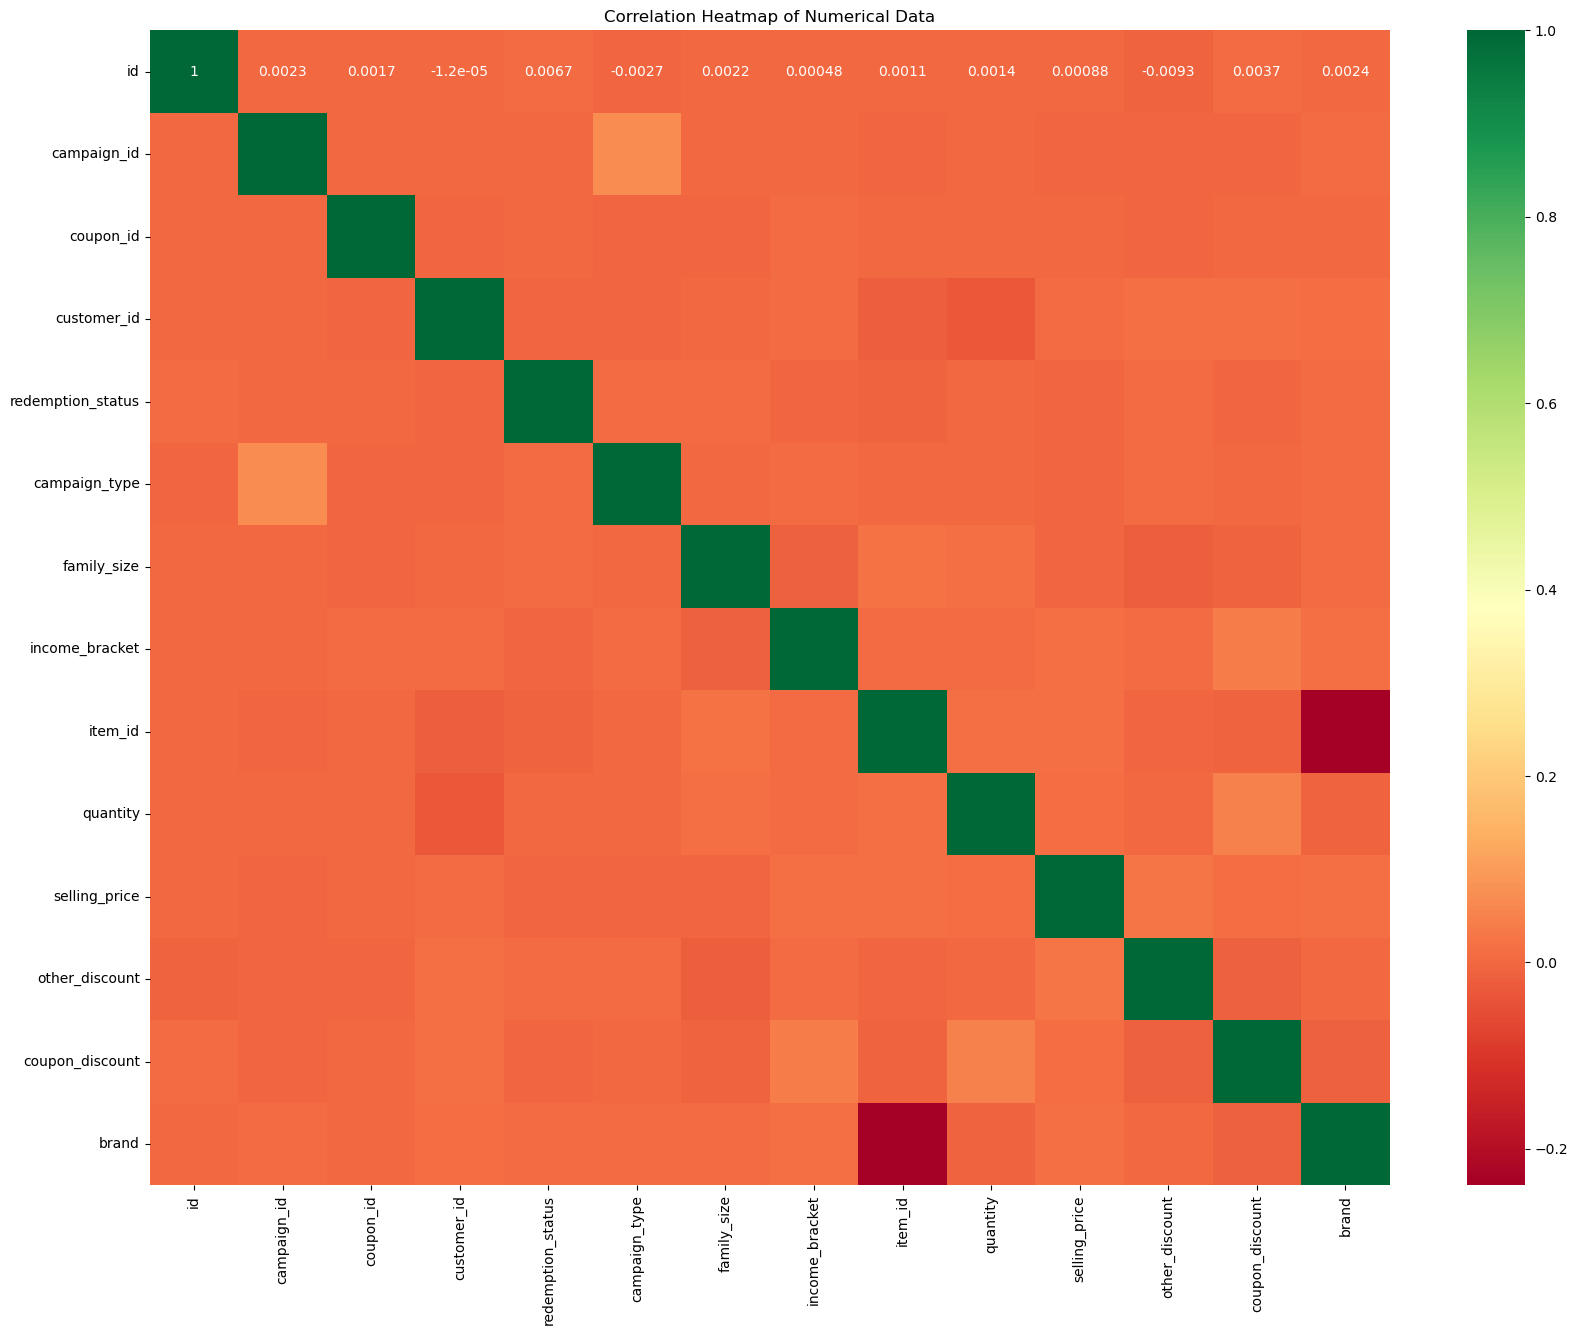

In [44]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(20,15))
#sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap of Numerical Data')
plt.show()

In [45]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,24,647,2197,0,1,08/07/13,29/08/13,26-35,Married,...,9,86,2023-04-30,5,565.71,1.57,1.28,15,Established,Electronics
1,2,27,167,2254,0,1,16/06/13,18/06/13,46-55,Married,...,8,31,2023-12-24,1,763.67,56.07,13.74,20,Local,Electronics
2,3,20,212,2901,1,0,16/02/13,21/02/13,36-45,Married,...,1,14,2023-02-01,8,824.10,70.84,21.88,7,Local,Clothing
3,4,24,819,571,1,1,08/07/13,29/08/13,26-35,Married,...,7,16,2023-02-08,5,894.23,84.74,1.62,17,Established,Clothing
4,5,21,699,960,0,1,30/07/13,28/08/13,36-45,Single,...,4,35,2023-08-30,2,232.78,29.91,14.74,15,Established,Electronics


# Feature Engineering

## Campaign Duration Finding

In [48]:
# creating a slice of the main dataframe
ch_data = data[['start_date','end_date']]

In [49]:
ch_data.head()

,start_date,end_date
0,08/07/13,29/08/13
1,16/06/13,18/06/13
2,16/02/13,21/02/13
3,08/07/13,29/08/13
4,30/07/13,28/08/13


In [50]:
# creating columns for starting day and ending day
ser1=[]
ser2=[]
for i in range(len(ch_data)):
    ser1.append(int(ch_data['start_date'][i][:2]))
    ser2.append(int(ch_data['end_date'][i][:2]))

ch_data['start_day'] = ser1
ch_data['end_day'] = ser2

# creating columns for starting month and ending month
mon1=[]
mon2=[]
for i in range(len(ch_data)):
    mon1.append(int(ch_data['start_date'][i][3:5]))
    mon2.append(int(ch_data['end_date'][i][3:5]))

ch_data['start_month'] = mon1
ch_data['end_month'] = mon2

# creating columns for starting year and ending year
year1=[]
year2=[]
for i in range(len(ch_data)):
    year1.append(2000 + int(ch_data['start_date'][i][6:8]))
    year2.append(2000 +int(ch_data['end_date'][i][6:8]))

ch_data['start_year'] = year1
ch_data['end_year'] = year2

In [51]:
ch_data.head()

,start_date,end_date,start_day,end_day,start_month,end_month,start_year,end_year
0,08/07/13,29/08/13,8,29,7,8,2013,2013
1,16/06/13,18/06/13,16,18,6,6,2013,2013
2,16/02/13,21/02/13,16,21,2,2,2013,2013
3,08/07/13,29/08/13,8,29,7,8,2013,2013
4,30/07/13,28/08/13,30,28,7,8,2013,2013


In [52]:
# finding the campaign duration using datetime
diff_start = []
diff_end = []
for a,b,c in zip(ch_data['start_day'],ch_data['start_month'],ch_data['start_year']):
    diff_start.append(datetime.datetime(c,b,a))

for a,b,c in zip(ch_data['end_day'],ch_data['end_month'],ch_data['end_year']):
    diff_end.append(datetime.datetime(c,b,a))

diff = []
for x,y in zip(diff_start,diff_end):
    diff.append((y-x).days)
    
# adding the campaign duration column to the main dataframe
data['campaign_duration'] = diff

In [53]:
data.campaign_duration.head()

0    52
1     2
2     5
3    52
4    29
Name: campaign_duration, dtype: int64

In [54]:
fix_data = data

## Binding point

In [56]:
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78368 entries, 0 to 78367
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 78368 non-null  int64  
 1   campaign_id        78368 non-null  int64  
 2   coupon_id          78368 non-null  int64  
 3   customer_id        78368 non-null  int64  
 4   redemption_status  78368 non-null  int64  
 5   campaign_type      78368 non-null  int64  
 6   start_date         78368 non-null  object 
 7   end_date           78368 non-null  object 
 8   age_range          78368 non-null  object 
 9   marital_status     78368 non-null  object 
 10  rented             78368 non-null  bool   
 11  family_size        78368 non-null  int64  
 12  no_of_children     78368 non-null  object 
 13  income_bracket     78368 non-null  int64  
 14  item_id            78368 non-null  int64  
 15  date               78368 non-null  object 
 16  quantity           783

In [57]:
fix_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,...,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration
0,1,24,647,2197,0,1,08/07/13,29/08/13,26-35,Married,...,86,2023-04-30,5,565.71,1.57,1.28,15,Established,Electronics,52
1,2,27,167,2254,0,1,16/06/13,18/06/13,46-55,Married,...,31,2023-12-24,1,763.67,56.07,13.74,20,Local,Electronics,2
2,3,20,212,2901,1,0,16/02/13,21/02/13,36-45,Married,...,14,2023-02-01,8,824.10,70.84,21.88,7,Local,Clothing,5
3,4,24,819,571,1,1,08/07/13,29/08/13,26-35,Married,...,16,2023-02-08,5,894.23,84.74,1.62,17,Established,Clothing,52
4,5,21,699,960,0,1,30/07/13,28/08/13,36-45,Single,...,35,2023-08-30,2,232.78,29.91,14.74,15,Established,Electronics,29


In [58]:
fix_data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'start_date', 'end_date', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'item_id', 'date', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'brand', 'brand_type', 'category',
       'campaign_duration'],
      dtype='object')

In [59]:
fix_data['rented'] = fix_data['rented'].astype('float64')

In [60]:
# performing some data encoding 
fix_data['campaign_type'].replace({'X':0,'Y':1},inplace=True)
fix_data['marital_status'].replace({'Married':0,'Single':1},inplace=True)
fix_data['rented'].replace({0.0:0,1.0:1},inplace=True)
fix_data['family_size'].replace({'1':1,'2':2,'3':3,'4':4,'5':5,'6':6},inplace=True)
fix_data['no_of_children'].replace({'1':1,'2':2,'3':3,'4':4,'5':5,'6':6},inplace=True)
fix_data['brand_type'].replace({'Established':1,'Local':0},inplace=True)

In [61]:
len(fix_data.groupby('category').count())

5

In [62]:
# getting out the category index
ind = fix_data.groupby('category').count().index

# creating a dictionary of key and value pair
dic_prop = {}
count = 1
for key in ind:
    dic_prop[key] = count
    count+=1
    
# performing the data encoding
fix_data['category'].replace(dic_prop,inplace=True)

ind2 = fix_data.groupby('age_range').count().index
dic_prop2 = {}
count2 = 1
for key in ind2:
    dic_prop2[key] = count2
    count2+=1
    
# performing the data encoding
fix_data['age_range'].replace(dic_prop2,inplace=True)


In [63]:
# checking out the data 
pd.set_option("display.max_rows", None, "display.max_columns", None)
fix_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration
0,1,24,647,2197,0,1,08/07/13,29/08/13,2,0,0.0,1,4.0,9,86,2023-04-30,5,565.71,1.57,1.28,15,1,3,52
1,2,27,167,2254,0,1,16/06/13,18/06/13,4,0,0.0,3,5.0,8,31,2023-12-24,1,763.67,56.07,13.74,20,0,3,2
2,3,20,212,2901,1,0,16/02/13,21/02/13,3,0,0.0,4,5.0,1,14,2023-02-01,8,824.10,70.84,21.88,7,0,2,5
3,4,24,819,571,1,1,08/07/13,29/08/13,2,0,1.0,6,6.0,7,16,2023-02-08,5,894.23,84.74,1.62,17,1,2,52
4,5,21,699,960,0,1,30/07/13,28/08/13,3,1,1.0,2,4.0,4,35,2023-08-30,2,232.78,29.91,14.74,15,1,3,29


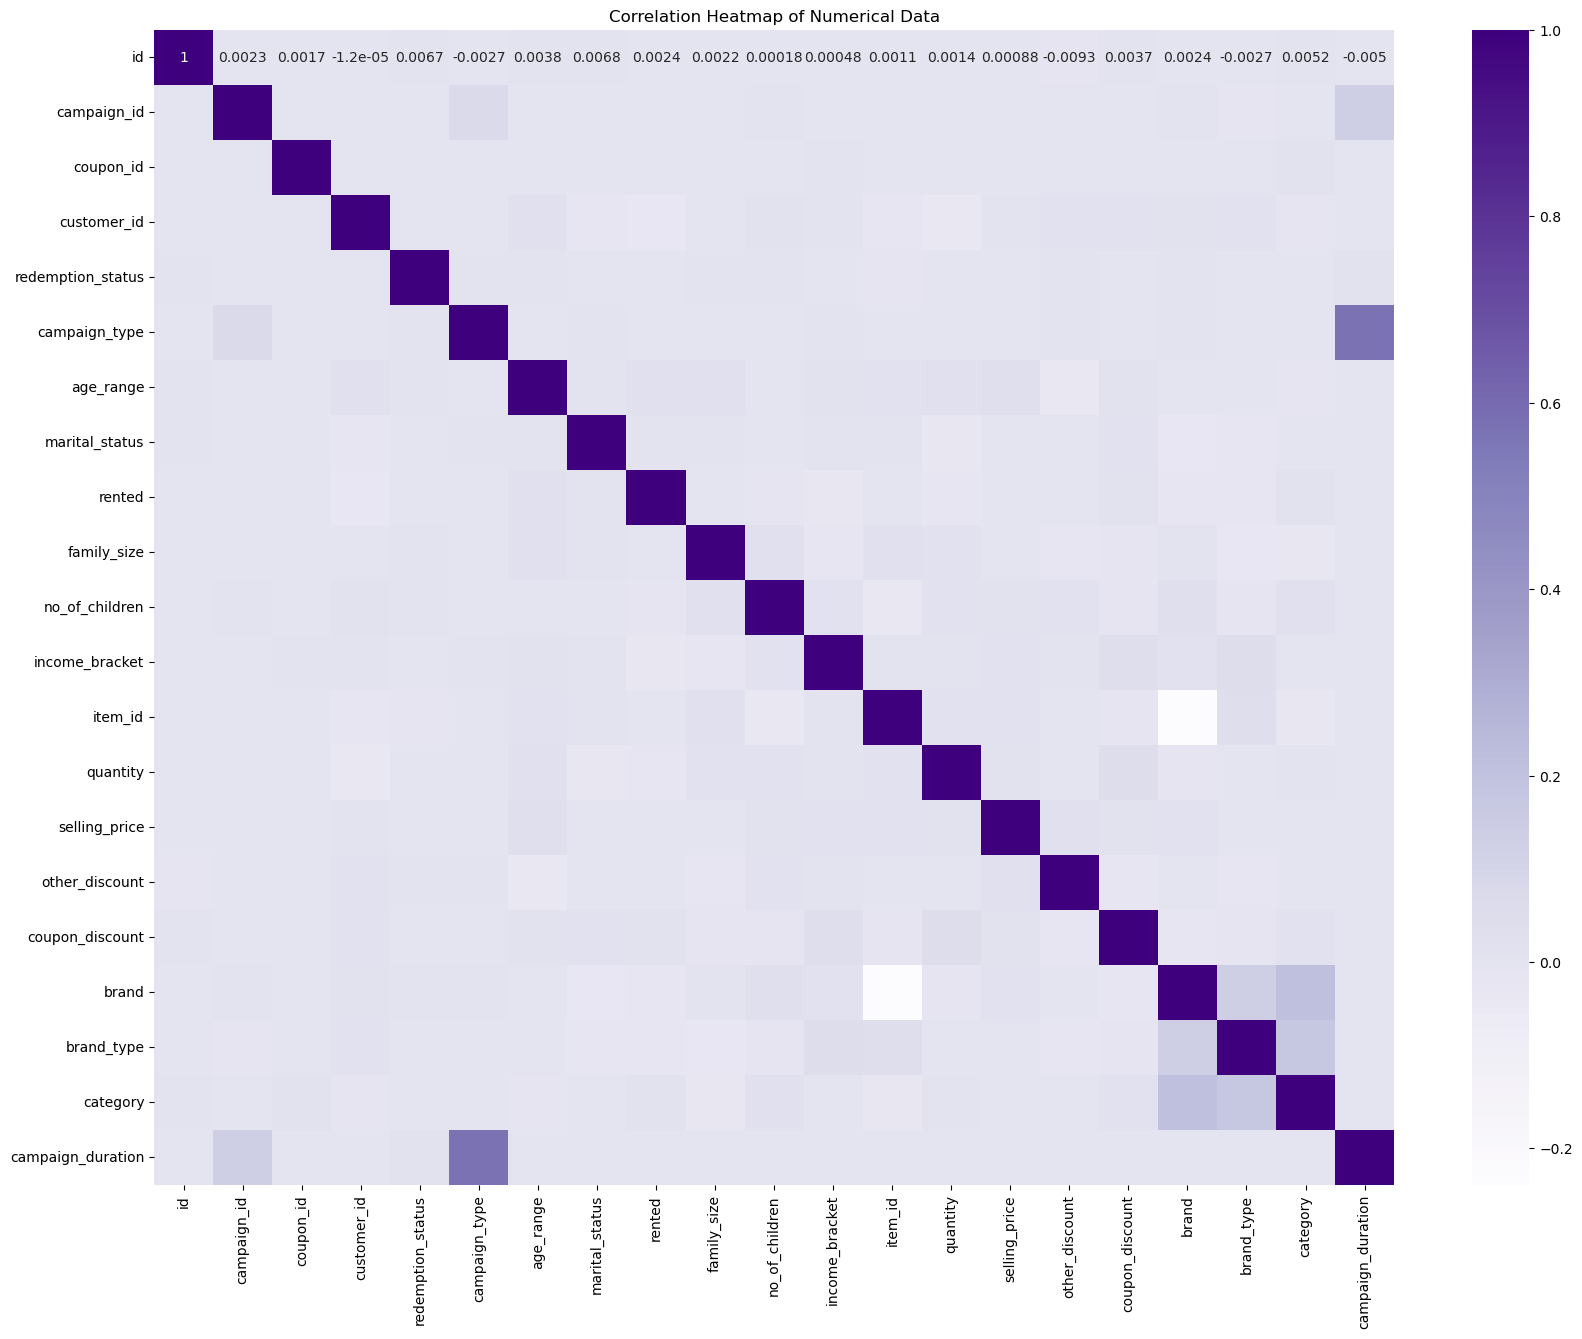

In [64]:
data = fix_data
# plotting a heatmap to check coorelation matrix


numerical_columns = data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(20,15))
#sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)
sns.heatmap(correlation_matrix, annot=True, cmap='Purples')
plt.title('Correlation Heatmap of Numerical Data')
plt.show()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78368 entries, 0 to 78367
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 78368 non-null  int64  
 1   campaign_id        78368 non-null  int64  
 2   coupon_id          78368 non-null  int64  
 3   customer_id        78368 non-null  int64  
 4   redemption_status  78368 non-null  int64  
 5   campaign_type      78368 non-null  int64  
 6   start_date         78368 non-null  object 
 7   end_date           78368 non-null  object 
 8   age_range          78368 non-null  int64  
 9   marital_status     78368 non-null  int64  
 10  rented             78368 non-null  float64
 11  family_size        78368 non-null  int64  
 12  no_of_children     78368 non-null  float64
 13  income_bracket     78368 non-null  int64  
 14  item_id            78368 non-null  int64  
 15  date               78368 non-null  object 
 16  quantity           783

## Logistic Regression Model Building

In [67]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [68]:
data['income_bracket'] = data['income_bracket']*1000
data['prod_income'] = (abs(data['other_discount'])/data['selling_price']*100)

In [69]:
data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'start_date', 'end_date', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'item_id', 'date', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'brand', 'brand_type', 'category',
       'campaign_duration', 'prod_income'],
      dtype='object')

In [70]:
data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,date,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,campaign_duration,prod_income
0,1,24,647,2197,0,1,08/07/13,29/08/13,2,0,0.0,1,4.0,9000,86,2023-04-30,5,565.71,1.57,1.28,15,1,3,52,0.277527
1,2,27,167,2254,0,1,16/06/13,18/06/13,4,0,0.0,3,5.0,8000,31,2023-12-24,1,763.67,56.07,13.74,20,0,3,2,7.342177
2,3,20,212,2901,1,0,16/02/13,21/02/13,3,0,0.0,4,5.0,1000,14,2023-02-01,8,824.10,70.84,21.88,7,0,2,5,8.596044
3,4,24,819,571,1,1,08/07/13,29/08/13,2,0,1.0,6,6.0,7000,16,2023-02-08,5,894.23,84.74,1.62,17,1,2,52,9.476309
4,5,21,699,960,0,1,30/07/13,28/08/13,3,1,1.0,2,4.0,4000,35,2023-08-30,2,232.78,29.91,14.74,15,1,3,29,12.849042


In [71]:
data.rented = data.rented.astype('int64')
data.selling_price = data.selling_price.astype('int64')
data.no_of_children = data.no_of_children.astype('int64')
data.prod_income = data.prod_income.astype('int64')


redemption_status
1    521
0    479
Name: count, dtype: int64
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Logistic Regression - Accuracy: 0.47333333333333333
Logistic Regression - Precision: 0.5
Logistic Regression - Recall: 0.4936708860759494
Logistic Regression - F1 Score: 0.4968152866242039
Random Forest - Accuracy: 0.43
Random Forest - Precision: 0.46107784431137727
Random Forest - Recall: 0.4873417721518987
Random Forest - F1 Score: 0.47384615384615386


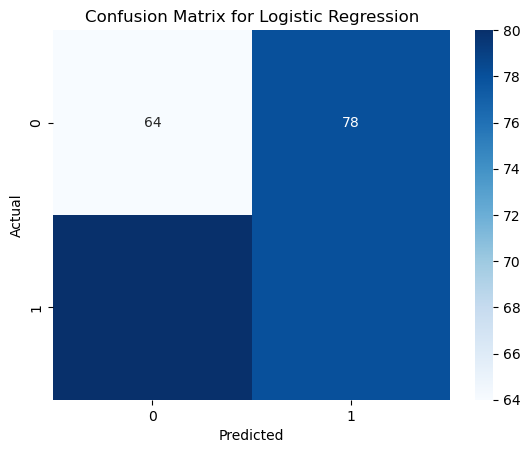

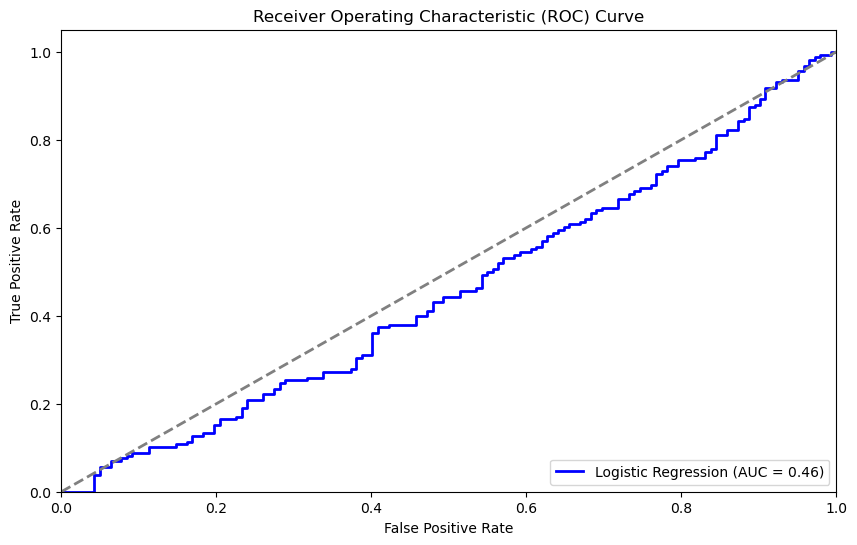

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Set random seed for reproducibility
np.random.seed(42)

# Generate a larger synthetic dataset
n_samples = 1000
data = pd.DataFrame({
    'campaign_type': np.random.randint(0, 2, n_samples),
    'marital_status': np.random.randint(0, 2, n_samples),
    'rented': np.random.randint(0, 2, n_samples),
    'family_size': np.random.randint(1, 7, n_samples),
    'selling_price': np.random.randint(200, 1000, n_samples),
    'age_range': np.random.randint(1, 5, n_samples),
    'no_of_children': np.random.randint(0, 7, n_samples),
    'income_bracket': np.random.randint(1000, 10000, n_samples),
    'quantity': np.random.randint(1, 10, n_samples),
    'brand_type': np.random.randint(0, 2, n_samples),
    'category': np.random.randint(1, 5, n_samples),
    'prod_income': np.random.randint(0, 20, n_samples),
    'redemption_status': np.random.choice(['Y', 'N'], n_samples, p=[0.5, 0.5])
})

# Encode the target variable
data['redemption_status'] = data['redemption_status'].map({'Y': 1, 'N': 0})

# Check class distribution
print(data['redemption_status'].value_counts())

# Extract features and target
X = data[['campaign_type', 'marital_status', 'rented', 'family_size', 'selling_price',
          'age_range', 'no_of_children', 'income_bracket', 'quantity', 'brand_type', 
          'category', 'prod_income']]
y = data['redemption_status']

# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=42)

# Standardize the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Perform grid search for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression:", grid.best_params_)

# Train the Logistic Regression model with best parameters
logreg = LogisticRegression(**grid.best_params_)
logreg.fit(X_train, y_train)

# Predict on the test set using Logistic Regression
y_pred_logreg = logreg.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression - Accuracy:", metrics.accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression - Precision:", metrics.precision_score(y_test, y_pred_logreg))
print("Logistic Regression - Recall:", metrics.recall_score(y_test, y_pred_logreg))
print("Logistic Regression - F1 Score:", metrics.f1_score(y_test, y_pred_logreg))

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set using Random Forest
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest - Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("Random Forest - Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Random Forest - Recall:", metrics.recall_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", metrics.f1_score(y_test, y_pred_rf))


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [73]:
X = data[['campaign_type','marital_status','rented','family_size','selling_price','age_range','no_of_children','income_bracket','quantity','brand_type','category','prod_income']]
#X = data[['campaign_type','marital_status']]
y = data['redemption_status']

In [74]:
X.head()


,campaign_type,marital_status,rented,family_size,selling_price,age_range,no_of_children,income_bracket,quantity,brand_type,category,prod_income
0,1,0,0,1,565,2,4,9000,5,1,3,0
1,1,0,0,3,763,4,5,8000,1,0,3,7
2,0,0,0,4,824,3,5,1000,8,0,2,8
3,1,0,1,6,894,2,6,7000,5,1,2,9
4,1,1,1,2,232,3,4,4000,2,1,3,12


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=5)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [77]:
y_pred=logreg.predict(X_test)

In [78]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5002764663349071
Precision: 0.5027758150802463
Recall: 0.42197560149102
F1 Score: 0.45884574639583614


In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np



# Encode the target variable
data['redemption_status'] = data['redemption_status'].map({'Y': 1, 'N': 0})

# Extract features and target
X = data[['campaign_type', 'marital_status', 'rented', 'family_size', 'selling_price',
          'age_range', 'no_of_children', 'income_bracket', 'quantity', 'brand_type', 
          'category', 'prod_income']]
y = data['redemption_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy * 100:.2f}%')


2024-07-02 09:38:14.182519: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 09:38:14.185941: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 09:38:14.220991: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 09:38:14.893799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


62694/62694 ━━━━━━━━━━━━━━━━━━━━ 88s 1ms/step - accuracy: 0.0000e+00 - loss: nan
Accuracy: 0.00%
